In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from concurrent.futures import ThreadPoolExecutor, as_completed
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [3]:
traindata = pd.read_csv('data/mitbih_train.csv',header=None)
testdata = pd.read_csv('data/mitbih_test.csv',header=None)

In [4]:
traindata

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
testdata

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [6]:
y_test=testdata[len(testdata.columns)-1] #Taking the last column as y
testdataNoY=testdata.drop(testdata.columns[[len(testdata.columns)-1]], axis=1) #Remove the last column(removing y)
x_test = testdataNoY 

In [7]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

In [9]:
y_train=traindata[len(traindata.columns)-1]#Taking the last column as y
trainDataNoY=traindata.drop(traindata.columns[[len(traindata.columns)-1]], axis=1) #Remove the last column(removing y)
x_train = trainDataNoY

In [10]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

<h3>1. Data Preprocessing</h3>Data Cleaning: Check for missing or inconsistent data, and handle outliers if necessary.
Data Encoding: Convert categorical variables into numerical ones using techniques like one-hot encoding or label encoding, if needed.

<h3>2. Sample balancing</h3>Class Imbalance Handling: Before moving forward, check if your dataset has class imbalance (e.g., significantly more samples of one class). If so, consider techniques like:

Resampling: Either oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
Class Weights: Apply class weights in your model to handle imbalanced classes

<h4>2.1 Analyzing the balance of the data</h4>

In [20]:
class_frequencies=y_train.value_counts() #Count how many occurrences of each different classe there is in y 
print("Absolute Class Frequencies:\n", class_frequencies)

Absolute Class Frequencies:
 187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


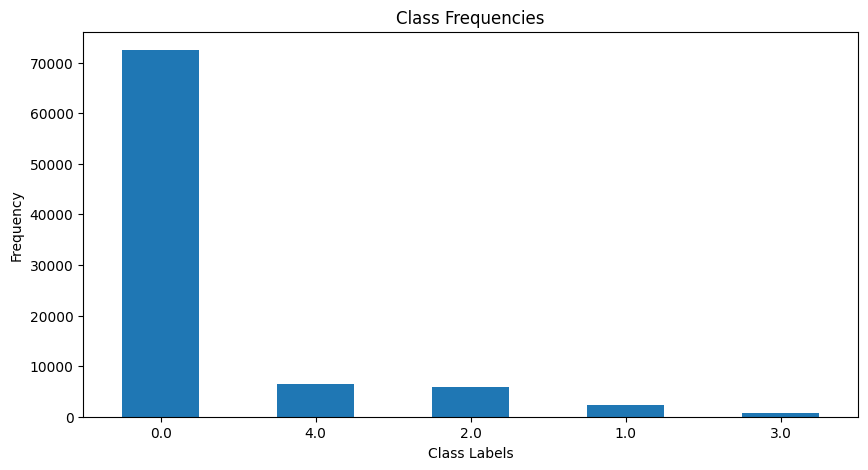

In [22]:
fig=plt.figure(figsize=(10,5))
class_frequencies.plot(kind='bar')
plt.title('Class Frequencies')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [16]:
class_proportions = y_train.value_counts(normalize=True)#Take the percentage of each different class in y
print("Class Proportions (Relative Frequencies):\n", class_proportions)

Class Proportions (Relative Frequencies):
 187
0.0    0.827729
4.0    0.073452
2.0    0.066108
1.0    0.025390
3.0    0.007321
Name: proportion, dtype: float64


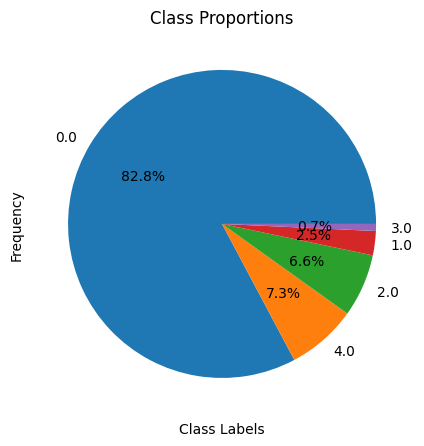

In [25]:
fig=plt.figure(figsize=(10,5))
class_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Proportions')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<strong>A common rule of thumb is that if the minority class represents less than 10–20% of the total samples, the data is often considered imbalanced.
In our case the data is highly unbalanced , so we must apply a balancing data strategy.</strong> 

<h4>2.2 Applying balancing data strategy to the data</h4>

In [ ]:
"""
print("----- Weighted loss function -----")
x = data[:,1:]
y = data[:,0]

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
"""

<h3>3. Feature Selection</h3>Feature Importance Analysis: Use techniques such as correlation, mutual information, or methods like Recursive Feature Elimination (RFE) to select the most relevant features.

<h3>4. Data Scaling</h3>
Scaling Features: Normalize or standardize your features, depending on the algorithm you plan to use (e.g., SVM, Logistic Regression, and KNN benefit from scaling). Be sure not to scale categorical features or binary columns (if any).

In [12]:
scaler = MinMaxScaler()

In [13]:
y_test=testdata[len(testdata.columns)-1] #Taking the last column as y
testdataNoY=testdata.drop(testdata.columns[[len(testdata.columns)-1]], axis=1) #Remove the last column(removing y)
x_test = scaler.fit_transform(testdataNoY) 

In [14]:
y_train=traindata[len(traindata.columns)-1]#Taking the last column as y
trainDataNoY=traindata.drop(traindata.columns[[len(traindata.columns)-1]], axis=1) #Remove the last column(removing y)
x_train = scaler.fit_transform(trainDataNoY)

<h3>5. Cross Validation</h3>K-Fold Cross-Validation: Use this to evaluate your model's performance on different subsets of the data and ensure generalizability.

You could also try Stratified K-Fold if you have imbalanced classes to maintain the proportion of classes across folds.

In [ ]:
class ModelResults:
        def __init__(self,modelName=None, accuracy=None, recall=None, precision=None,report=None):
            self.modelName = modelName
            self.accuracy = accuracy
            self.recall = recall
            self.precision = precision
            self.report = report
        def __toString__(self):
            return f"ModelResults(model name={self.modelName}, accuracy={self.accuracy}, recall={self.recall}, precision={self.precision}\n{self.report})"

In [ ]:
def trainAndTestModel(modelName, model):
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    
    model_accuracy = 0
    model_recall = np.array([0., 0., 0., 0., 0.])
    model_precision = np.array([0., 0., 0., 0., 0.])
    
    try:
        # Train the model
        model.fit(x_train, y_train)
        
        # Test the model
        y_pred = model.predict(x_test)
        
        # Model performance    
        report = classification_report(y_test, y_pred, zero_division=1)  # Aquí se añadió el parámetro zero_division
        print(report)  # Imprimir el classification report
        
        # Performance scores
        model_accuracy += accuracy_score(y_test, y_pred)
        model_recall += recall_score(y_test, y_pred, average=None, zero_division=1)
        model_precision += precision_score(y_test, y_pred, average=None, zero_division=1)
        
        print(f"{modelName}, Done Training and testModel")
        print("\n")
        
        return modelName, model_accuracy, model_recall, model_precision,report
    
    except Exception as e:
        print(f"An error occurred during the train-test: {e}")
        return modelName, model_accuracy, model_recall, model_precision,report

In [ ]:
models = {
    "SVC": SVC(kernel='linear', C=1.0),  # C is the regularization parameter
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=5),  # n_estimators is the number of trees, max_depth is the max depth of the tree
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),  # learning_rate shrinks the contribution of each tree
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear'),  # C is the inverse of regularization strength, solver is the algorithm to use in the optimization problem
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=4),  # max_depth is the maximum depth of the tree
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),  # n_neighbors is the number of neighbors to use
   "GaussianNB": GaussianNB(var_smoothing=1e-9),  # var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0)  # n_estimators is the number of trees, learning_rate shrinks the contribution of each classifier
}

In [ ]:
n_folds=5
acc = 0
recall = np.array([0., 0., 0.,0.,0.])
precision = np.array([0., 0., 0.,0.,0.])

models_results=[]
for name,model in models.items():
    model_name,model_accuracy, model_recall, model_precision,report=trainAndTestModel(modelName=name,model=model)
    models_results.append(ModelResults(model_name,model_accuracy, model_recall, model_precision,report))

In [ ]:
for results in models_results:
    print(results.__toString__())

<h3>6. Model Selection and Hyperparameter Tuning</h3>Initial Model Training: Select a few candidate models based on your problem type (e.g., Logistic Regression, SVM, Random Forest).
Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the best combination of hyperparameters for your model, ideally with cross-validation incorporated.

<h3>7. Model Evaluation</h3>
Evaluate on Test Data: After tuning, use the test set to evaluate your model using performance metrics like accuracy, precision, recall, F1-score, and confusion matrix.
ROC Curve and AUC for binary classification tasks.